In [1]:
from iSDM.species import Species, GBIFSpecies

In [2]:
my_species = GBIFSpecies(name_species="Etheostoma_blennioides")

In [3]:
my_species.name_species

'Etheostoma_blennioides'

#### just some logging logic to output in this notebook, nothing to care about.

In [4]:
import logging
root = logging.getLogger()
root.addHandler(logging.StreamHandler())

## 1. Find and download all matching species data from GBIF, show only first 5 observation rows (head()). At this point no data cleaning is done yet.

In [5]:
my_species.find_species_occurrences().head()

Loading species ... 
Number of occurrences: 7226 
True
Loaded species: ['Etheostoma blennioides'] 


,accessRights,associatedOccurrences,associatedReferences,associatedSequences,basisOfRecord,bibliographicCitation,catalogNumber,class,classKey,collectionCode,...,type,typeStatus,verbatimCoordinateSystem,verbatimDepth,verbatimElevation,verbatimEventDate,verbatimLocality,vernacularName,waterBody,year
0,"Open Access, http://creativecommons.org/public...",NaN,NaN,NaN,PRESERVED_SPECIMEN,Etheostoma blennioides (YPM ICH 028456),YPM ICH 028456,Actinopterygii,204,VZ,...,PhysicalObject,NaN,NaN,NaN,NaN,NaN,NaN,perches; perch-like fishes; ray-finned fishes;...,NaN,2015.0
1,NaN,NaN,NaN,NaN,HUMAN_OBSERVATION,NaN,1937841,Actinopterygii,204,Observations,...,NaN,NaN,NaN,NaN,NaN,Thu Sep 10 2015 14:51:49 GMT-0400 (EDT),"3827–4235 Fobes Rd, Rock Creek, OH, US",NaN,NaN,2015.0
2,NaN,NaN,NaN,NaN,HUMAN_OBSERVATION,NaN,623289,Actinopterygii,204,Observations,...,NaN,NaN,NaN,NaN,NaN,2014-04-13,Beaver Creek,NaN,NaN,2014.0
3,"Open Access, http://creativecommons.org/public...",NaN,Det. by: Thomas J. Near,NaN,PRESERVED_SPECIMEN,Etheostoma blennioides (YPM ICH 026964),YPM ICH 026964,Actinopterygii,204,VZ,...,PhysicalObject,NaN,NaN,NaN,NaN,NaN,NaN,perches; perch-like fishes; ray-finned fishes;...,NaN,2014.0
4,"Open Access, http://creativecommons.org/public...",NaN,"Det. by: William Freedburg, Thomas J. Near",NaN,PRESERVED_SPECIMEN,Etheostoma blennioides (YPM ICH 027023),YPM ICH 027023,Actinopterygii,204,VZ,...,PhysicalObject,NaN,NaN,NaN,NaN,NaN,NaN,perches; perch-like fishes; ray-finned fishes;...,NaN,2014.0


#### taxonkey derived from GBIF data. It's a sort of unique ID per species

In [6]:
my_species.ID # taxonkey derived from GBIF. It's a sort of unique ID per species

2382397

### Data is serialized and saved in a file. 
Default location: current working directory. Default filename: GBIFID of the species

In [7]:
my_species.save_data()

Saved data: /home/daniela/git/iSDM/notebooks/2382397.pkl 


In [8]:
my_species.source.name

'GBIF'

### Let's get a general idea of where the species is distributed on the map

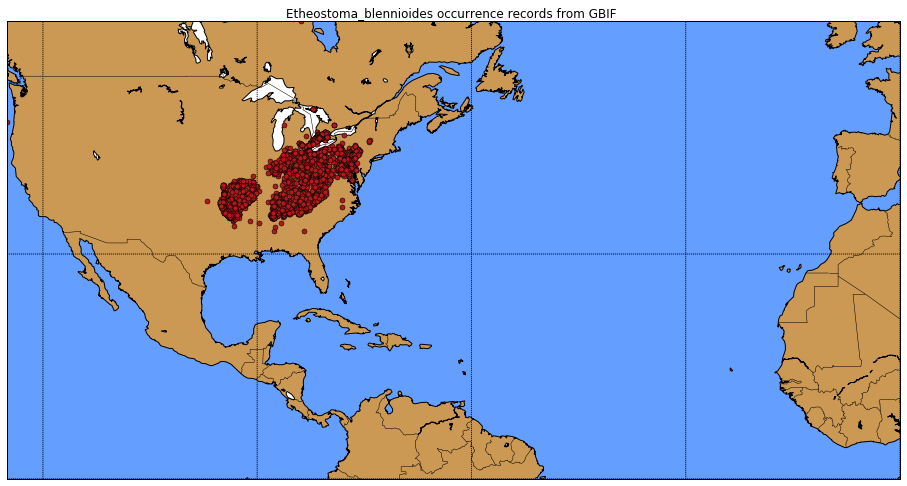

In [9]:
%matplotlib inline
my_species.plot_species_occurrence()

#### The map is always zoomed to the species borders. Notice low right corner also has one red point.

### 2. Or just load existing data into a Species object. Let's use the file we saved before.

In [10]:
data = my_species.load_data("./2382397.pkl") # or just load existing data into Species object

Loading data from: ./2382397.pkl
Succesfully loaded previously saved data.


In [11]:
data.columns # all the columns available per observation

Index(['accessRights', 'associatedOccurrences', 'associatedReferences',
       'associatedSequences', 'basisOfRecord', 'bibliographicCitation',
       'catalogNumber', 'class', 'classKey', 'collectionCode',
       ...
       'type', 'typeStatus', 'verbatimCoordinateSystem', 'verbatimDepth',
       'verbatimElevation', 'verbatimEventDate', 'verbatimLocality',
       'vernacularName', 'waterBody', 'year'],
      dtype='object', length=138)

## 3. Examples of simple (meta-)data exploration

#### Show all unique values of the 'country' column

In [12]:
data['country'].unique().tolist()

['United States', nan, 'Canada', 'Namibia', 'India']

In [13]:
data.shape # there are 7226 observations, 138 parameters per observation

(7226, 138)

In [14]:
data['vernacularName'].unique().tolist() # self-explanatory

['perches; perch-like fishes; ray-finned fishes; vertebrates; chordates; animals',
 nan,
 'Greenside Darter',
 'GREENSIDE DARTER',
 'greenside darter']

### How about latitude/longitude? Does the data need cleaning?
head() or tail() is only used to limit the tabular output in this notebook. The "data" structure contains it all.

In [15]:
data['decimalLatitude'].tail(10)

7216    43.03333
7217    34.84256
7218         NaN
7219    43.03333
7220         NaN
7221         NaN
7222         NaN
7223         NaN
7224         NaN
7225    41.38022
Name: decimalLatitude, dtype: float64

### Hmm, so some values are 'NaN', which means not available.  
We can fill them with something (default?), or drop those records where latitude/longitude are not available. Let's drop records where the latitude/longitude data is not available

In [16]:
import numpy as np
data_cleaned = data.dropna(subset = ['decimalLatitude', 'decimalLongitude']) # drop records where data not available

In [17]:
data_cleaned.shape # less occurrence records now: 5223

(5223, 138)

In [18]:
data_cleaned['basisOfRecord'].unique()

array(['PRESERVED_SPECIMEN', 'HUMAN_OBSERVATION', 'UNKNOWN'], dtype=object)

In [20]:
# this many records with no decimalLatitude and decimalLongitude
import numpy as np
data[data['decimalLatitude'].isnull() & data['decimalLongitude'].isnull()].size

276414

#### How many of those have no 'locality' or 'verbatimLocality'? : 27 apparently.

In [21]:
data[data['decimalLatitude'].isnull() & 
     data['decimalLongitude'].isnull() & 
     data['locality'].isnull() & 
     data['verbatimLocality'].isnull()]

,accessRights,associatedOccurrences,associatedReferences,associatedSequences,basisOfRecord,bibliographicCitation,catalogNumber,class,classKey,collectionCode,...,type,typeStatus,verbatimCoordinateSystem,verbatimDepth,verbatimElevation,verbatimEventDate,verbatimLocality,vernacularName,waterBody,year
1277,http://fieldmuseum.org/about/copyright-informa...,NaN,NaN,NaN,PRESERVED_SPECIMEN,NaN,112647,Actinopterygii,204,Fishes,...,PhysicalObject,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.0
4342,NaN,NaN,NaN,NaN,UNKNOWN,NaN,56-5116,Actinopterygii,204,ON-CDC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1972.0
4729,NaN,NULL,NaN,NaN,PRESERVED_SPECIMEN,NaN,GCRL 17588,Actinopterygii,204,Occurrence,...,NaN,NaN,NULL,NULL,NULL,NULL,NaN,NaN,NaN,1968.0
5207,NaN,NULL,NaN,NaN,PRESERVED_SPECIMEN,NaN,GCRL 17580,Actinopterygii,204,Occurrence,...,NaN,NaN,NULL,NULL,NULL,NULL,NaN,NaN,NaN,1964.0
5220,NaN,NULL,NaN,NaN,PRESERVED_SPECIMEN,NaN,GCRL 17585,Actinopterygii,204,Occurrence,...,NaN,NaN,NULL,NULL,NULL,NULL,NaN,NaN,NaN,1964.0
5236,NaN,NULL,NaN,NaN,PRESERVED_SPECIMEN,NaN,GCRL 17592,Actinopterygii,204,Occurrence,...,NaN,NaN,NULL,NULL,NULL,NULL,NaN,NaN,NaN,1964.0
5243,NaN,NULL,NaN,NaN,PRESERVED_SPECIMEN,NaN,GCRL 17598,Actinopterygii,204,Occurrence,...,NaN,NaN,NULL,NULL,NULL,NULL,NaN,NaN,NaN,1964.0
5250,NaN,NULL,NaN,NaN,PRESERVED_SPECIMEN,NaN,GCRL 17583,Actinopterygii,204,Occurrence,...,NaN,NaN,NULL,NULL,NULL,NULL,NaN,NaN,NaN,1964.0
5253,NaN,NULL,NaN,NaN,PRESERVED_SPECIMEN,NaN,GCRL 17578,Actinopterygii,204,Occurrence,...,NaN,NaN,NULL,NULL,NULL,NULL,NaN,NaN,NaN,1964.0
5275,NaN,NULL,NaN,NaN,PRESERVED_SPECIMEN,NaN,GCRL 17582,Actinopterygii,204,Occurrence,...,NaN,NaN,NULL,NULL,NULL,NULL,NaN,NaN,NaN,1964.0


In [22]:
data_cleaned[['dateIdentified', 'day', 'month', 'year']].head()

,dateIdentified,day,month,year
0,NaN,23.0,5.0,2015.0
1,2015-09-11T23:37:54.000+0000,10.0,9.0,2015.0
2,2014-04-14T00:24:18.000+0000,13.0,4.0,2014.0
3,NaN,13.0,5.0,2014.0
4,NaN,14.0,5.0,2014.0


Seems like not all records have a 'dateIdentified', but 'day','month', 'year' fields are there for many (all?) records. TODO: what about verbatimDate

### Select only observation records newer than 2010; 
Say that only latitude, longitude, rightsHolder, datasetName columns are interesting for our selection.

In [23]:
data_selected = data_cleaned[data_cleaned['year']>2010][['decimalLatitude','decimalLongitude', 'rightsHolder', 'datasetName']]

#### more filtering: select only those with a non-null datasetName

In [24]:
data_selected[~data_selected.datasetName.isnull()].head(10)

,decimalLatitude,decimalLongitude,rightsHolder,datasetName
1,41.79664,-80.97289,Robert L Curtis,iNaturalist research-grade observations
2,37.97240,-83.56716,Brian Wulker,iNaturalist research-grade observations
10,35.07780,-83.97430,North Carolina Museum of Natural Sciences,NCSM Fishes Collection
13,35.17770,-83.88780,North Carolina Museum of Natural Sciences,NCSM Fishes Collection
20,35.16030,-83.92020,North Carolina Museum of Natural Sciences,NCSM Fishes Collection
39,36.40790,-81.40160,North Carolina Museum of Natural Sciences,NCSM Fishes Collection
48,36.41300,-81.40710,North Carolina Museum of Natural Sciences,NCSM Fishes Collection
51,36.55790,-81.21670,North Carolina Museum of Natural Sciences,NCSM Fishes Collection
52,36.54960,-81.00230,North Carolina Museum of Natural Sciences,NCSM Fishes Collection
54,36.38760,-91.53010,NaN,Auburn University Museum Fish Collection


### If you hare happy with this filtering, and you want to save the species data:

In [25]:
my_species.set_data(data_selected) # update the object "my_species" to contain the filtered data

In [26]:
my_species.save_data(file_name="updated_dataset.pkl")

Saved data: /home/daniela/git/iSDM/notebooks/updated_dataset.pkl 


### Plot our filtered selection 

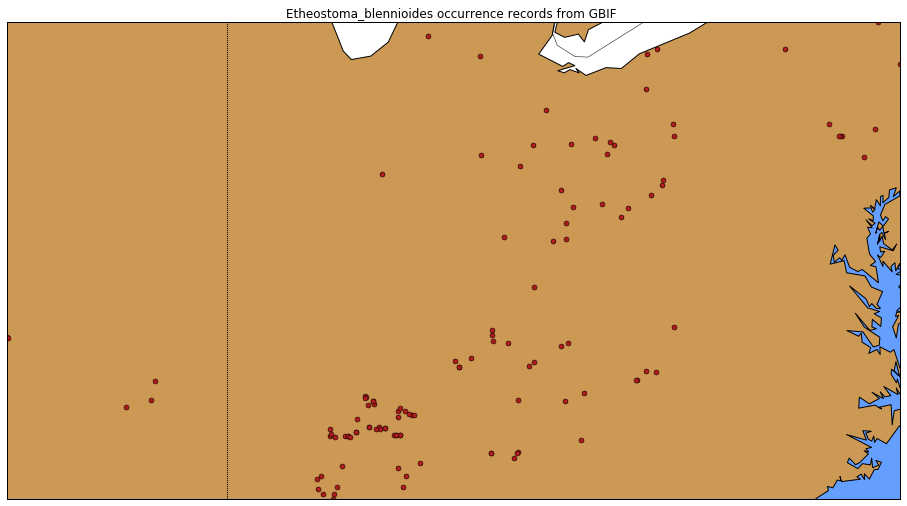

In [27]:
my_species.plot_species_occurrence()

In [29]:
my_species.get_data().shape # there are 119 records now

(119, 4)

### 4. Load data from downloaded csv file (from GBIF website, not API; differs a bit)

In [32]:
csv_data = my_species.load_csv('../data/GBIF.csv') 

Loading data from: ../data/GBIF.csv
Succesfully loaded previously CSV data.
Updated species ID: 2382397 


In [33]:
csv_data.head() # let's peak into the data

,gbifid,datasetkey,occurrenceid,kingdom,phylum,class,order,family,genus,species,...,recordnumber,identifiedby,rights,rightsholder,recordedby,typestatus,establishmentmeans,lastinterpreted,mediatype,issue
0,1224542608,71e6db8e-f762-11e1-a439-00145eb45e9a,urn:catalog:OMNH:FISH:85718,Animalia,Chordata,Actinopterygii,Perciformes,Percidae,Etheostoma,Etheostoma blennioides,...,NaN,Dr. Aaron Geheber,NaN,Sam Noble Oklahoma Museum of Natural History,Aaron Geheber,NaN,NaN,2015-12-23T21:01Z,NaN,GEODETIC_DATUM_ASSUMED_WGS84
1,17598896,83a8c0da-f762-11e1-a439-00145eb45e9a,NaN,Animalia,Chordata,Actinopterygii,Perciformes,Percidae,Etheostoma,Etheostoma blennioides,...,NaN,"Baldwin, M.E.",NaN,NaN,"Baldwin, M.E.; Bowlby, J.N.",NaN,NaN,2014-06-04T23:44Z,NaN,GEODETIC_DATUM_ASSUMED_WGS84
2,17598905,83a8c0da-f762-11e1-a439-00145eb45e9a,NaN,Animalia,Chordata,Actinopterygii,Perciformes,Percidae,Etheostoma,Etheostoma blennioides,...,NaN,"Baldwin, Mary Elizabeth",NaN,NaN,"Baldwin, Mary Elizabeth; Casbourn, Hugh R.",NaN,NaN,2014-06-04T23:44Z,NaN,GEODETIC_DATUM_ASSUMED_WGS84
3,198193430,961f602a-f762-11e1-a439-00145eb45e9a,NaN,Animalia,Chordata,Actinopterygii,Perciformes,Percidae,Etheostoma,Etheostoma blennioides,...,NaN,NaN,NaN,NaN,"R.D. Suttkus, Eaton & Donahue",NaN,NaN,2014-06-05T03:09Z,NaN,GEODETIC_DATUM_ASSUMED_WGS84
4,198193618,961f602a-f762-11e1-a439-00145eb45e9a,NaN,Animalia,Chordata,Actinopterygii,Perciformes,Percidae,Etheostoma,Etheostoma blennioides,...,NaN,NaN,NaN,NaN,"R.D. Suttkus, J.S. Ramsey & M.D. Dahlberg",NaN,NaN,2014-06-05T03:09Z,NaN,TAXON_MATCH_HIGHERRANK;GEODETIC_DATUM_ASSUMED_...


In [34]:
csv_data['specieskey'].unique()

array([2382397])

In [35]:
my_species.save_data() # by default this 'speciesKey' is used. Alternative name can be provided

Saved data: /home/daniela/git/iSDM/notebooks/2382397.pkl 


In [36]:
csv_data.columns.size # csv data for some reason a lot less columns

42

In [39]:
data.columns.size # data from using GBIF API directly

138

#### Which columns are in 'data', but not in 'csv_data'?

In [19]:
list(set(data.columns.tolist()) - set(csv_data.columns.tolist())) # hmm, 'decimalLatitude' vs 'decimallatitude'

['infraspecificEpithet',
 'collectionCode',
 'individualCount',
 'orderKey',
 'dynamicProperties',
 'depthAccuracy',
 'identifier',
 'geodeticDatum',
 'created',
 'rightsHolder',
 'datasetName',
 'taxonRemarks',
 'recordNumber',
 'taxonKey',
 'facts',
 'georeferenceSources',
 'license',
 'county',
 'elevationAccuracy',
 'eventID',
 'verbatimElevation',
 'islandGroup',
 'collectionID',
 'dateIdentified',
 'occurrenceRemarks',
 'eventDate',
 'media',
 'verbatimDepth',
 'higherClassification',
 'accessRights',
 'identifiedBy',
 'associatedSequences',
 'protocol',
 'phylumKey',
 'issues',
 'vernacularName',
 'otherCatalogNumbers',
 'coordinateAccuracyInMeters',
 'institutionCode',
 'disposition',
 'modified',
 'fieldNotes',
 'verbatimCoordinateSystem',
 'occurrenceStatus',
 'lastCrawled',
 'associatedOccurrences',
 'decimalLongitude',
 'locationID',
 'http://unknown.org/occurrenceDetails',
 'type',
 'locationAccordingTo',
 'familyKey',
 'stateProvince',
 'startDayOfYear',
 'typeStatus',
 '

#### Which columns are in 'csv_data' but not in 'data'?

In [40]:
list(set(csv_data.columns.tolist()) - set(data.columns.tolist()))

['recordedby',
 'decimallatitude',
 'decimallongitude',
 'datasetkey',
 'typestatus',
 'collectioncode',
 'issue',
 'establishmentmeans',
 'rightsholder',
 'identifiedby',
 'lastinterpreted',
 'infraspecificepithet',
 'taxonrank',
 'occurrenceid',
 'publishingorgkey',
 'scientificname',
 'eventdate',
 'taxonkey',
 'elevationaccuracy',
 'countrycode',
 'depthaccuracy',
 'institutioncode',
 'mediatype',
 'gbifid',
 'catalognumber',
 'specieskey',
 'basisofrecord',
 'recordnumber']